In [1]:
!pip install gdal

In [2]:
from osgeo import gdal
from osgeo import ogr
from osgeo import osr
from osgeo import gdal_array
from osgeo import gdalconst

In [3]:
datasource = ogr.Open(r"C:\Users\Smitesh\Downloads\india-latest.osm.pbf")

In [4]:
num_layers = datasource.GetLayerCount()

# Iterate over layers and print their names
for i in range(num_layers):
    layer = datasource.GetLayerByIndex(i)
    layer_name = layer.GetName()
    print("Layer Name:", layer_name)

# Close the datasource
datasource = None

Layer Name: points
Layer Name: lines
Layer Name: multilinestrings
Layer Name: multipolygons
Layer Name: other_relations


In [5]:
import subprocess

pbf_file = r"C:\Users\Smitesh\Downloads\india-latest.osm.pbf"
output_geojson = r"C:\Users\Smitesh\Downloads\output.geojson"

# Convert .pbf to GeoJSON using ogr2ogr
subprocess.call(['ogr2ogr', '-f', 'GeoJSON', output_geojson, pbf_file])

1

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to the GeoJSON file
geojson_file = r"C:\Users\Smitesh\Downloads\output.geojson"

# Read the GeoJSON file using GeoPandas
data = gpd.read_file(geojson_file)

# Plot the spatial data using Matplotlib
data.plot()

# Show the plot
plt.show()

C:\Users\Smitesh\anaconda3\envs\Main\lib\site-packages\geopandas\plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


ValueError: cannot convert float NaN to integer

<Figure size 432x288 with 1 Axes>

In [7]:
!pip install geopandas

In [8]:
dataset = ogr.Open(r'C:\Users\Smitesh\Downloads\central-zone-latest-free.shp')
layer = dataset.GetLayer()

In [9]:
extent = layer.GetExtent()

In [10]:
extent

(74.0915034, 84.6357689, 17.8027684, 31.3648725)

In [11]:
features = []
feature = layer.GetNextFeature()
while feature:
    features.append(feature)
    feature = layer.GetNextFeature()

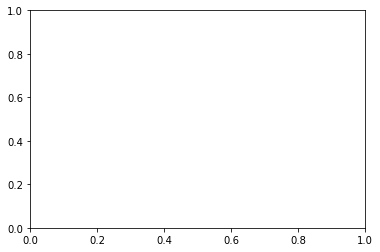

In [12]:
fig, ax = plt.subplots()

In [ ]:
for feature in features:
    geometry = feature.GetGeometryRef()
    x = []
    y = []
    for i in range(geometry.GetPointCount()):
        x.append(geometry.GetX(i))
        y.append(geometry.GetY(i))
    ax.plot(x, y)

In [ ]:
ax.set_xlim(extent[0], extent[1])
ax.set_ylim(extent[2], extent[3])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [1]:
import numpy as np
import pandas as pd
import re



In [23]:
dem_data = pd.read_csv("/home/smitesh22/Data/extent.csv")
    
filename_location = []
for index, row in dem_data.iterrows():
    coords = re.findall('\d+', row.filename)
    coords = [int(coord) for coord in coords[:2]]
    updated_coords = []
    data = [int(np.round(item)) for item in row[1:]]
    
    for coord in coords:
        updated_coords.append(coord)
        updated_coords.append(coord+1)
    assert sorted(data) == sorted(updated_coords), f'Error with DEM file name and extend do not match {row.filename}'

In [9]:
dem_data

,filename,upper_lat,upper_long,lower_lat,lower_long
0,N15E078_wgs84,16.000139,79.000139,14.999861,77.999861
1,N19E072_wgs84,20.000139,73.000139,18.999861,71.999861
2,N20E074_wgs84,21.000139,75.000139,19.999861,73.999861
3,N22E074_wgs84,23.000139,75.000139,21.999861,73.999861
4,N32E076_wgs84,33.000139,77.000139,31.999861,75.999861
...,...,...,...,...,...
95,N23E081_wgs84,24.000139,82.000139,22.999861,80.999861
96,N24E076_wgs84,25.000139,77.000139,23.999861,75.999861
97,N21E075_wgs84,22.000139,76.000139,20.999861,74.999861
98,N22E078_wgs84,23.000139,79.000139,21.999861,77.999861


In [24]:
location = '/home/smitesh22/Data/Solar Irradiance/N09E078_wgs84.csv'

df = pd.read_csv(location, nrows=2, header=None)
latitude = int(np.ceil(float(df[5][1])))
longitude = int(np.ceil(float(df[6][1])))
pattern = r'N(\d+)E(\d+)_wgs84.csv'

match = re.search(pattern, location)
if match:
    number1 = int(match.group(1))
    number2 = int(match.group(2))

assert latitude == number1 and longitude == number2

In [41]:
import glob

for i, file in enumerate(glob.glob("/home/smitesh22/Data/Solar Irradiance/*.csv")):    
    df = pd.read_csv(file, nrows=2, header=None)
    latitude = int(np.round(float(df[5][1])))
    longitude = int(np.round(float(df[6][1])))
    pattern = r'N(\d+)E(\d+)_wgs84.csv'
    
    match = re.search(pattern, file)
    if match:
        number1 = int(match.group(1))
        number2 = int(match.group(2))
    assert latitude == number1 and longitude == number2, f'Solar Irradiance data problem with file {file} {latitude, longitude}'